In [20]:
import json, pickle

# To work with Google colab
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/Utils/utils.py
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/LAB3_2/Assignment1/ESN_base.py

from Utils.utils import show_result
from LAB3_2.Assignment1.NumpyEchoStateNetworks import Seq2SeqESN

In [21]:
model_results = json.load(open("caches/metric_esn.json","r"))

with open("caches/narma_model.pickle", "br") as file:
    narma_model:Seq2SeqESN = pickle.load(file)

with open("caches/mg17_model.pickle", "br") as file:
    mg17_model:Seq2SeqESN = pickle.load(file)

results = {}

# Assignment 1.1: NARMA10 task with ESN

## Hyperparameters

1) Hidden units
2) Omega (scaling factor)
3) Spectral radius
4) Tikhonov regularization

| Hyperparameters 	 |   Values      	    |    Description       	    |
|:-----------------:|:------------------:|:-------------------------:|
|   units      	    | 20, 50, 100, 150 	 |    Hidden units      	    |
|   omega      	    |  0.2, 0.5, 0.7  	  | Omega (scaling factor) 	  |
|   radius     	    |  0.7, 0.8, 0.9  	  |   Spectral radius     	   |
|   tikhonov    	   | 1e-3, 1e-4, 1e-5 	 | Tikhonov regularization 	 |

## Model

### Input matrix (untrained)

In [22]:
print(narma_model.Wx.shape)
narma_model.Wx

(150, 1)


array([[ 0.01481278],
       [ 0.20574675],
       [-0.4500759 ],
       [ 0.05119911],
       [-0.48159342],
       [ 0.20075573],
       [ 0.32403893],
       [ 0.45160886],
       [ 0.1572976 ],
       [ 0.06072533],
       [ 0.44626509],
       [-0.01905493],
       [-0.30576274],
       [ 0.17931791],
       [-0.4433625 ],
       [ 0.08143072],
       [ 0.23557055],
       [ 0.42117761],
       [-0.07573768],
       [ 0.03804985],
       [-0.41289406],
       [-0.33093485],
       [ 0.25784622],
       [-0.41473227],
       [-0.47316937],
       [ 0.39239593],
       [-0.04168311],
       [-0.3984545 ],
       [ 0.29591394],
       [-0.41990255],
       [-0.07775859],
       [-0.03716174],
       [-0.31737331],
       [ 0.11629068],
       [ 0.05959915],
       [-0.27206353],
       [ 0.03861954],
       [-0.18168885],
       [ 0.04245639],
       [ 0.38799039],
       [ 0.41721071],
       [ 0.15499038],
       [-0.08747216],
       [-0.05748319],
       [-0.25850763],
       [ 0

### Hidden matrix (untrained)

In [23]:
print(narma_model.Wh.shape)
narma_model.Wh

(150, 150)


array([[-0.10735021, -0.0489847 ,  0.09358829, ..., -0.032505  ,
        -0.10813215, -0.05594845],
       [-0.07813024,  0.11919832, -0.07626408, ..., -0.05886556,
        -0.0368589 , -0.08559404],
       [-0.0793099 , -0.06274496,  0.09206588, ..., -0.06979704,
         0.0689387 , -0.011971  ],
       ...,
       [-0.05543352,  0.02729663, -0.04991145, ...,  0.0735155 ,
         0.00933774,  0.0413187 ],
       [ 0.03723579, -0.02950711,  0.01851461, ..., -0.11694784,
         0.06850707, -0.04038211],
       [ 0.0605003 , -0.10533673, -0.01420402, ..., -0.08917981,
        -0.1115751 ,  0.08733962]])

### Hidden bias (untrained)

In [24]:
print(narma_model.bh.shape)
narma_model.bh

(150,)


array([-4.18808659e-01, -3.26147213e-01,  4.95508014e-01,  2.94632583e-01,
        4.39367008e-01, -4.75449068e-01, -2.94552439e-01, -5.29023466e-02,
       -3.54149502e-01,  3.20882689e-01, -2.10129617e-01, -8.79479262e-02,
        2.33422010e-01,  4.06274467e-01, -4.84391626e-01, -4.35299033e-01,
        4.39087824e-01,  2.63019390e-01,  2.13574898e-02,  2.49023316e-01,
        8.57910109e-03, -4.81921052e-01, -3.36925077e-01,  1.31762914e-01,
        4.70137560e-01,  2.98641177e-01, -1.10156127e-03, -4.41216454e-01,
       -3.97139347e-01,  3.33720313e-01, -9.18614402e-02,  2.51254083e-01,
        1.61193088e-01, -3.62505863e-01,  3.69109884e-01, -3.11731721e-01,
       -4.61861889e-01,  3.51014003e-01,  6.49941496e-02,  4.43210988e-01,
        4.16414408e-02,  5.44536219e-02, -3.69277205e-01, -2.57685162e-03,
        3.55188873e-01,  1.89003485e-01,  1.68512614e-01, -8.52144970e-02,
       -1.19534647e-01, -4.47227157e-01, -2.74177056e-01, -1.49433745e-01,
        2.28694658e-01, -

### Readout (trained)

In [25]:
print(narma_model.Wo.shape)
narma_model.Wo

(150, 1)


array([[ -2.70483421],
       [  6.56445467],
       [  0.11340981],
       [ -6.04809198],
       [  0.44112161],
       [-11.36123202],
       [  7.18126759],
       [ -4.98232461],
       [ 13.35801325],
       [ -3.3413212 ],
       [  0.35988687],
       [ -7.7393183 ],
       [  3.49602915],
       [-22.32494431],
       [ -3.06850287],
       [  0.08029358],
       [ -4.26286489],
       [ -7.09428718],
       [ -9.88814071],
       [  0.47394901],
       [  2.22107845],
       [ -5.47418885],
       [ -7.0257754 ],
       [ -5.47933659],
       [ -1.86060695],
       [ -0.52782099],
       [ 14.63542742],
       [ -7.80097464],
       [-15.51463461],
       [  3.76640989],
       [ -1.51578564],
       [  6.28290423],
       [ -0.52568804],
       [ -4.66456385],
       [ -8.50706694],
       [  0.23655191],
       [ -4.56806091],
       [ 10.6199484 ],
       [  3.02496589],
       [  3.28318966],
       [ 18.29765429],
       [ 10.56107497],
       [  4.89362816],
       [ -9

## Best model & Training loss

In [26]:
print(model_results["NARMA"]["best_config"])

{'units': 150, 'omega': 0.5, 'radius': 0.9, 'tikhonov': 1e-05}


## Metrics and result

Model selection
Training 0.017148 Validation 0.000266 Test 0.000203

Final retrain
Training 0.000168 Test 0.000181


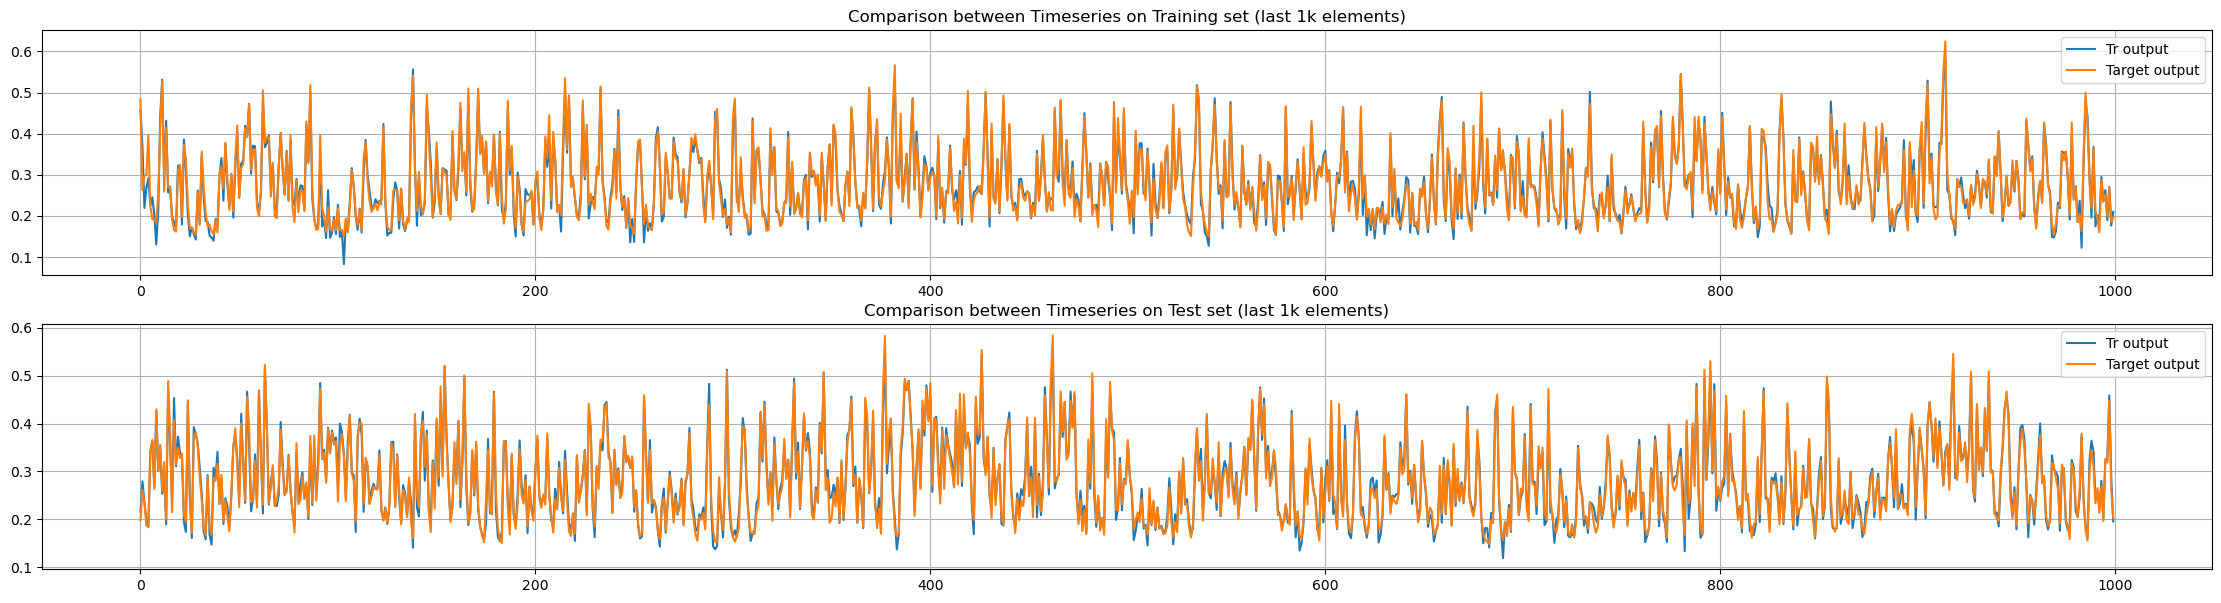

In [27]:
metrics = model_results["NARMA"]["Model_evaluation"]
print("Model selection")
print(f"Training {metrics[0]} Validation {metrics[1]} Test {metrics[2]}")
print("")
metrics = model_results["NARMA"]["Final_retrain"]
print("Final retrain")
print(f"Training {metrics[0]} Test {metrics[1]}")

show_result(model_results["NARMA"]["tr_pred"], model_results["NARMA"]["tr_y"],
            model_results["NARMA"]["ts_pred"], model_results["NARMA"]["ts_y"])


# Assignment 1.2: Mackey-Glass 17 task with TDNN


## Hyperparameters

As before

## Model

### Input matrix (untrained)

In [28]:
print(narma_model.Wx.shape)
mg17_model.Wx

(150, 1)


array([[ 0.0692564 ],
       [-0.42446562],
       [ 0.10448022],
       [-0.11570058],
       [ 0.16536608],
       [-0.36013647],
       [ 0.01179796],
       [-0.08988308],
       [-0.12148123],
       [-0.02919802],
       [ 0.0229329 ],
       [-0.35281318],
       [ 0.06044851],
       [ 0.33489086],
       [-0.14649554],
       [ 0.44344319],
       [-0.40383281],
       [ 0.13535768],
       [-0.39325005],
       [-0.07441446],
       [-0.25441848],
       [ 0.06492284],
       [-0.03617189],
       [ 0.22328675],
       [ 0.0147681 ],
       [ 0.02908407],
       [ 0.17528401],
       [ 0.33939034],
       [-0.0275708 ],
       [ 0.09581943],
       [ 0.24707612],
       [-0.4661856 ],
       [ 0.37009567],
       [ 0.362389  ],
       [-0.1229528 ],
       [ 0.05878731],
       [ 0.17530158],
       [-0.03895916],
       [ 0.08269762],
       [-0.26245831],
       [-0.45016498],
       [-0.18914087],
       [-0.3326305 ],
       [-0.28526275],
       [ 0.26250417],
       [-0

### Hidden matrix (untrained)

In [29]:
print(narma_model.Wh.shape)
mg17_model.Wh

(150, 150)


array([[ 0.02771484, -0.05933531, -0.09422826, ..., -0.10533783,
        -0.03133682,  0.16836422],
       [ 0.13611815, -0.06877297,  0.09640941, ...,  0.03331972,
         0.12077053,  0.055161  ],
       [-0.10295058, -0.14842294, -0.02133447, ..., -0.130983  ,
         0.17127365,  0.04409068],
       ...,
       [ 0.16397564,  0.04543277,  0.10609339, ..., -0.14078873,
         0.05469563, -0.12499872],
       [ 0.08001104,  0.10189331,  0.14285527, ..., -0.16146206,
        -0.15604548, -0.04303681],
       [ 0.02834519, -0.09324058, -0.00470771, ..., -0.03525149,
         0.0938534 , -0.11187388]])

### Hidden bias (untrained)

In [30]:
print(narma_model.bh.shape)
mg17_model.bh

(150,)


array([ 0.22343677, -0.33869362,  0.4662222 ,  0.41935149,  0.35014543,
       -0.33450509, -0.17926196, -0.21489658, -0.41342849,  0.10553507,
        0.39672125,  0.28771977,  0.41601959, -0.2914884 , -0.34044916,
        0.01689104,  0.13721627, -0.16463487, -0.25501069, -0.30288154,
        0.34514979, -0.17788626, -0.21558585,  0.03121217,  0.24764798,
        0.16362218,  0.22782284,  0.23052419,  0.29884763, -0.01152105,
        0.08421568,  0.12802843, -0.2897251 , -0.12546495, -0.04756227,
       -0.42883952, -0.4029611 , -0.27188993,  0.12078966, -0.48103189,
        0.01515945,  0.08843909, -0.44405058, -0.14901027, -0.11937202,
        0.23004043, -0.03229377,  0.36033542, -0.28454943,  0.36554173])

### Readout (trained)

In [31]:
print(narma_model.Wo.shape)
mg17_model.Wo

(150, 1)


array([[-0.18913077],
       [-1.21170938],
       [-0.52854059],
       [-0.8911198 ],
       [ 1.08803877],
       [ 0.3093514 ],
       [-0.07221986],
       [-0.46231068],
       [-0.01420708],
       [ 0.46063635],
       [ 0.42502695],
       [ 1.27375134],
       [ 1.37655668],
       [-0.36734429],
       [ 0.10723097],
       [ 0.40586095],
       [ 0.40186646],
       [-0.70855247],
       [-0.42486475],
       [ 1.65171754],
       [-0.04135548],
       [-0.07363516],
       [ 0.41830488],
       [ 1.41840812],
       [-0.11995139],
       [-0.22287526],
       [-0.42566414],
       [ 1.07278562],
       [-0.63259134],
       [ 0.20436638],
       [-0.11514661],
       [-0.83146483],
       [-0.37114021],
       [ 0.50072783],
       [-0.15695865],
       [-0.19725386],
       [ 1.63440826],
       [-0.24519661],
       [ 0.88228973],
       [ 0.097658  ],
       [-1.17517787],
       [-0.94838357],
       [-1.36924664],
       [-1.20991084],
       [ 0.29147575],
       [-1

## Best model & Training loss

In [32]:
print(model_results["MG17"]["best_config"])

{'units': 50, 'omega': 0.5, 'radius': 0.8, 'tikhonov': 0.0001}


## Metrics and result

Model selection
Training 0.000455 Validation 1e-06 Test 1e-06

Final retrain
Training 1e-06 Test 3e-06


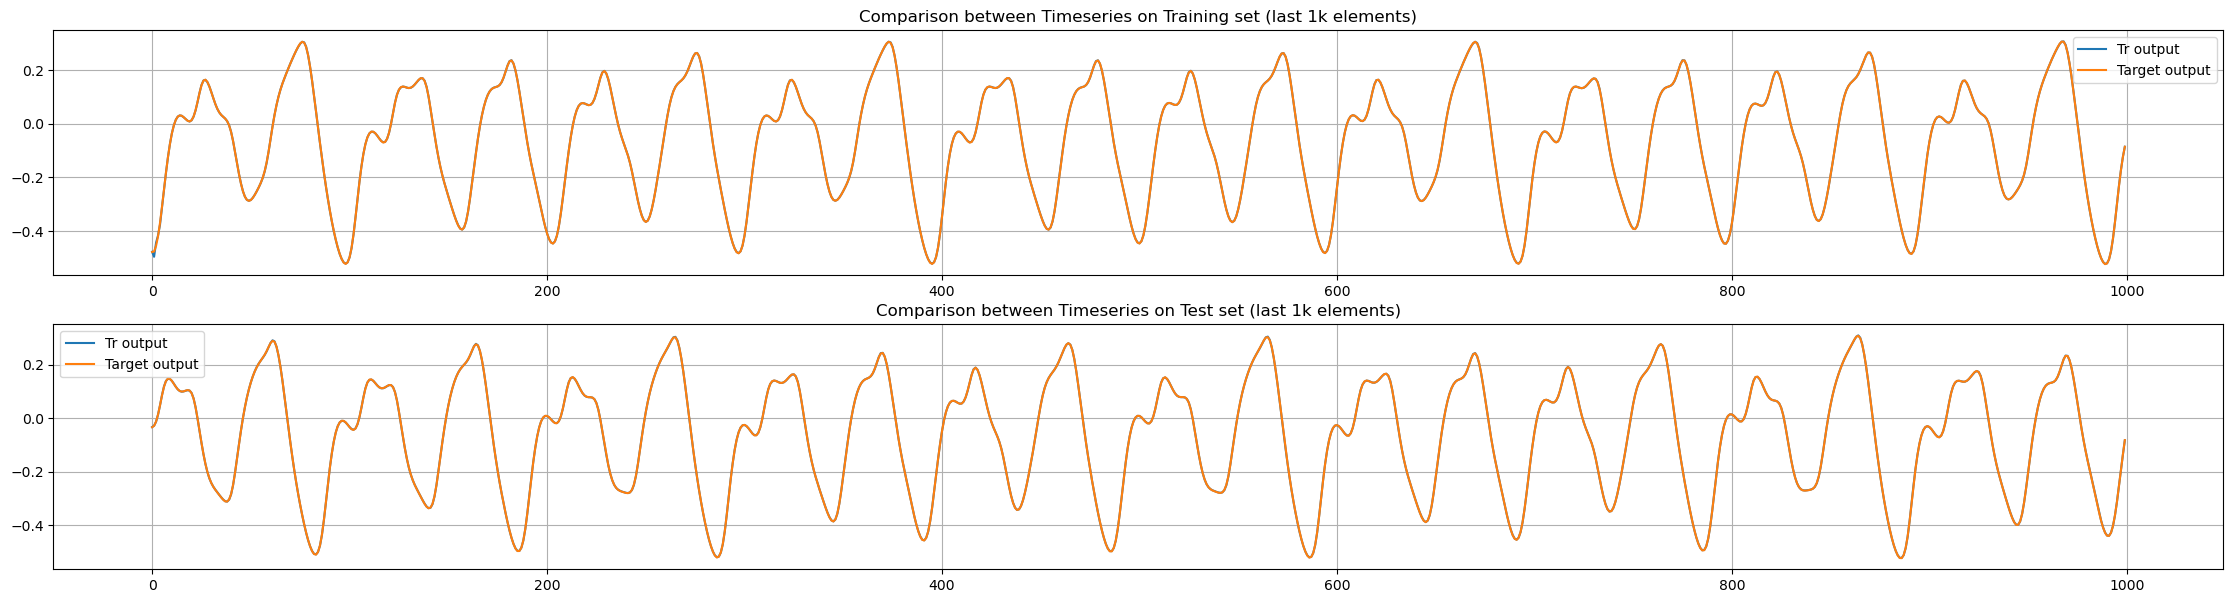

In [34]:
metrics = model_results["MG17"]["Model_evaluation"]
print("Model selection")
print(f"Training {metrics[0]} Validation {metrics[1]} Test {metrics[2]}")
print("")
metrics = model_results["MG17"]["Final_retrain"]
print("Final retrain")
print(f"Training {metrics[0]} Test {metrics[1]}")

show_result(model_results["MG17"]["tr_pred"], model_results["MG17"]["tr_y"],
            model_results["MG17"]["ts_pred"], model_results["MG17"]["ts_y"])